**#Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

**#importing Datasets**

In [3]:
d1 = pd.read_csv('Dataset/train.csv')
d2 = pd.read_csv('Dataset/test.csv')

df = pd.concat([d1,d2])

df.head()

ID    Price  Levy Manufacturer    Model  Prod. year   Category  \
0  45654403  13328.0  1399        LEXUS   RX 450        2010       Jeep   
1  44731507  16621.0  1018    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467.0     -        HONDA      FIT        2006  Hatchback   
3  45769185   3607.0   862         FORD   Escape        2011       Jeep   
4  45809263  11726.0   446        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0              Yes    Hybrid           3.5  186005 km        6.0   
1               No    Petrol             3  192000 km        6.0   
2               No    Petrol           1.3  200000 km        4.0   
3              Yes    Hybrid           2.5  168966 km        4.0   
4              Yes    Petrol           1.3   91901 km        4.0   

  Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0     Automatic          4x4  04-May        Left wheel  Silver       12  
1     Tiptronic          4x4  04-May        Left wheel   Black        8  
2      Variator        Front  04-May  Right-hand drive   Black        2  
3     Automatic          4x4  04-May        Left wheel   White        0  
4     Automatic        Front  04-May        Left wheel  Silver        4

**#id is not required from the dataset so removing that**

In [4]:
df = df.drop('ID',axis=1)
df.head()

Price  Levy Manufacturer    Model  Prod. year   Category  \
0  13328.0  1399        LEXUS   RX 450        2010       Jeep   
1  16621.0  1018    CHEVROLET  Equinox        2011       Jeep   
2   8467.0     -        HONDA      FIT        2006  Hatchback   
3   3607.0   862         FORD   Escape        2011       Jeep   
4  11726.0   446        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0              Yes    Hybrid           3.5  186005 km        6.0   
1               No    Petrol             3  192000 km        6.0   
2               No    Petrol           1.3  200000 km        4.0   
3              Yes    Hybrid           2.5  168966 km        4.0   
4              Yes    Petrol           1.3   91901 km        4.0   

  Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0     Automatic          4x4  04-May        Left wheel  Silver       12  
1     Tiptronic          4x4  04-May        Left wheel   Black        8  
2      Variator        Front  04-May  Right-hand drive   Black        2  
3     Automatic          4x4  04-May        Left wheel   White        0  
4     Automatic        Front  04-May        Left wheel  Silver        4

**Data insights from the Dataset**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27482 entries, 0 to 8244
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  float64
 1   Levy              27482 non-null  object 
 2   Manufacturer      27482 non-null  object 
 3   Model             27482 non-null  object 
 4   Prod. year        27482 non-null  int64  
 5   Category          27482 non-null  object 
 6   Leather interior  27482 non-null  object 
 7   Fuel type         27482 non-null  object 
 8   Engine volume     27482 non-null  object 
 9   Mileage           27482 non-null  object 
 10  Cylinders         27482 non-null  float64
 11  Gear box type     27482 non-null  object 
 12  Drive wheels      27482 non-null  object 
 13  Doors             27482 non-null  object 
 14  Wheel             27482 non-null  object 
 15  Color             27482 non-null  object 
 16  Airbags           27482 non-null  int64  

In [6]:
df.describe()

#price will be our target

Price    Prod. year     Cylinders       Airbags
count  1.923700e+04  27482.000000  27482.000000  27482.000000
mean   1.855593e+04   2010.912452      4.593734      6.563569
std    1.905813e+05      5.632865      1.413918      4.329256
min    1.000000e+00   1939.000000      1.000000      0.000000
25%    5.331000e+03   2009.000000      4.000000      4.000000
50%    1.317200e+04   2012.000000      4.000000      6.000000
75%    2.207500e+04   2015.000000      4.000000     12.000000
max    2.630750e+07   2020.000000    127.000000     16.000000

In [7]:
#check for nulls
df.isnull().sum()

Price               8245
Levy                   0
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
dtype: int64

**null values are there in Price, filling null values by Mean**

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [10]:
df.value_counts('Manufacturer')

Manufacturer
HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
                 ... 
TESLA               1
GREATWALL           1
HAVAL               1
ASTON MARTIN        1
LAMBORGHINI         1
Length: 65, dtype: int64

In [11]:
df.value_counts('Doors')

Doors
04-May    18332
02-Mar      777
>5          128
dtype: int64

In [12]:
#mileage has data in form of 1330000 km, removing the last three char i.e space k and m to make it a numerical data.

df['Mileage'] = df['Mileage'].str[:-3]

In [13]:
df['Levy'].value_counts()

-       5819
765      486
891      461
639      410
640      405
        ... 
870        1
1297       1
605        1
2216       1
3699       1
Name: Levy, Length: 559, dtype: int64

In [14]:
df['Levy']=df['Levy'].replace('-',np.nan)

In [15]:
df['Levy'].value_counts()

765     486
891     461
639     410
640     405
1017    298
       ... 
3112      1
822       1
3025      1
1924      1
115       1
Name: Levy, Length: 558, dtype: int64

In [16]:
#replacing '-' with 0, Dropping null values in Levy i.e. around 8273

In [17]:
data = df[df['Levy']!=0]
data  = df.dropna()

In [18]:
##creating csv of data file and just taking 10000 samples

In [19]:
data.to_csv('final.csv')

In [20]:
##loading new csv##

In [78]:
data = pd.read_csv('final.csv',index_col = 0, nrows=10000)

In [79]:
data.head()

Price  Levy Manufacturer     Model  Prod. year   Category  \
0  13328.0  1399        LEXUS    RX 450        2010       Jeep   
1  16621.0  1018    CHEVROLET   Equinox        2011       Jeep   
3   3607.0   862         FORD    Escape        2011       Jeep   
4  11726.0   446        HONDA       FIT        2014  Hatchback   
5  39493.0   891      HYUNDAI  Santa FE        2016       Jeep   

  Leather interior Fuel type Engine volume  Mileage  Cylinders Gear box type  \
0              Yes    Hybrid           3.5   186005        6.0     Automatic   
1               No    Petrol             3   192000        6.0     Tiptronic   
3              Yes    Hybrid           2.5   168966        4.0     Automatic   
4              Yes    Petrol           1.3    91901        4.0     Automatic   
5              Yes    Diesel             2   160931        4.0     Automatic   

  Drive wheels   Doors       Wheel   Color  Airbags  
0          4x4  04-May  Left wheel  Silver       12  
1          4x4  04-May  Left wheel   Black        8  
3          4x4  04-May  Left wheel   White        0  
4        Front  04-May  Left wheel  Silver        4  
5        Front  04-May  Left wheel   White        4

In [80]:
data.nunique()

Price               1793
Levy                 507
Manufacturer          48
Model                677
Prod. year            29
Category              10
Leather interior       2
Fuel type              6
Engine volume         84
Mileage             5404
Cylinders             12
Gear box type          4
Drive wheels           3
Doors                  3
Wheel                  2
Color                 16
Airbags               16
dtype: int64

In [81]:
data.dtypes

Price               float64
Levy                  int64
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage               int64
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

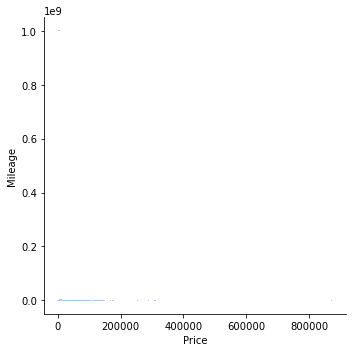

In [82]:
sns.displot(data, x = 'Price', y = 'Mileage')

<AxesSubplot:>

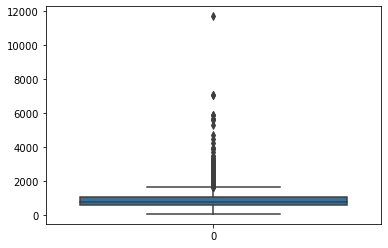

In [83]:
sns.boxplot(data['Levy'])

<AxesSubplot:>

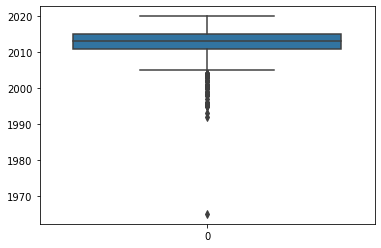

In [84]:
sns.boxplot(data['Prod. year'])

<AxesSubplot:>

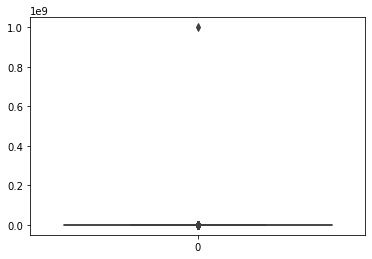

In [85]:
sns.boxplot(data['Mileage'])

<AxesSubplot:>

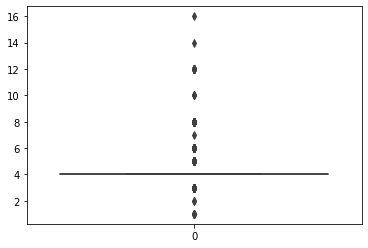

In [86]:
sns.boxplot(data['Cylinders'])

In [87]:
##Applyin LabelEncoder acroos categorical variables
from sklearn.preprocessing import LabelEncoder

In [88]:
data[['Manufacturer', 'Model', 'Category','Leather interior','Fuel type','Engine volume','Gear box type','Drive wheels','Doors','Wheel','Color']] = data[['Manufacturer', 'Model', 'Category','Leather interior','Fuel type','Engine volume','Gear box type','Drive wheels','Doors','Wheel','Color']].apply(LabelEncoder().fit_transform)

In [89]:
data.head()

Price  Levy  Manufacturer  Model  Prod. year  Category  Leather interior  \
0  13328.0  1399            25    544        2010         4                 1   
1  16621.0  1018             6    277        2011         4                 0   
3   3607.0   862            14    280        2011         4                 1   
4  11726.0   446            17    294        2014         3                 1   
5  39493.0   891            18    563        2016         4                 1   

   Fuel type  Engine volume  Mileage  Cylinders  Gear box type  Drive wheels  \
0          2             51   186005        6.0              0             0   
1          4             46   192000        6.0              2             0   
3          2             36   168966        4.0              0             0   
4          4             13    91901        4.0              0             1   
5          1             27   160931        4.0              0             1   

   Doors  Wheel  Color  Airbags  
0      1      0     12       12  
1      1      0      1        8  
3      1      0     14        0  
4      1      0     12        4  
5      1      0     14        4

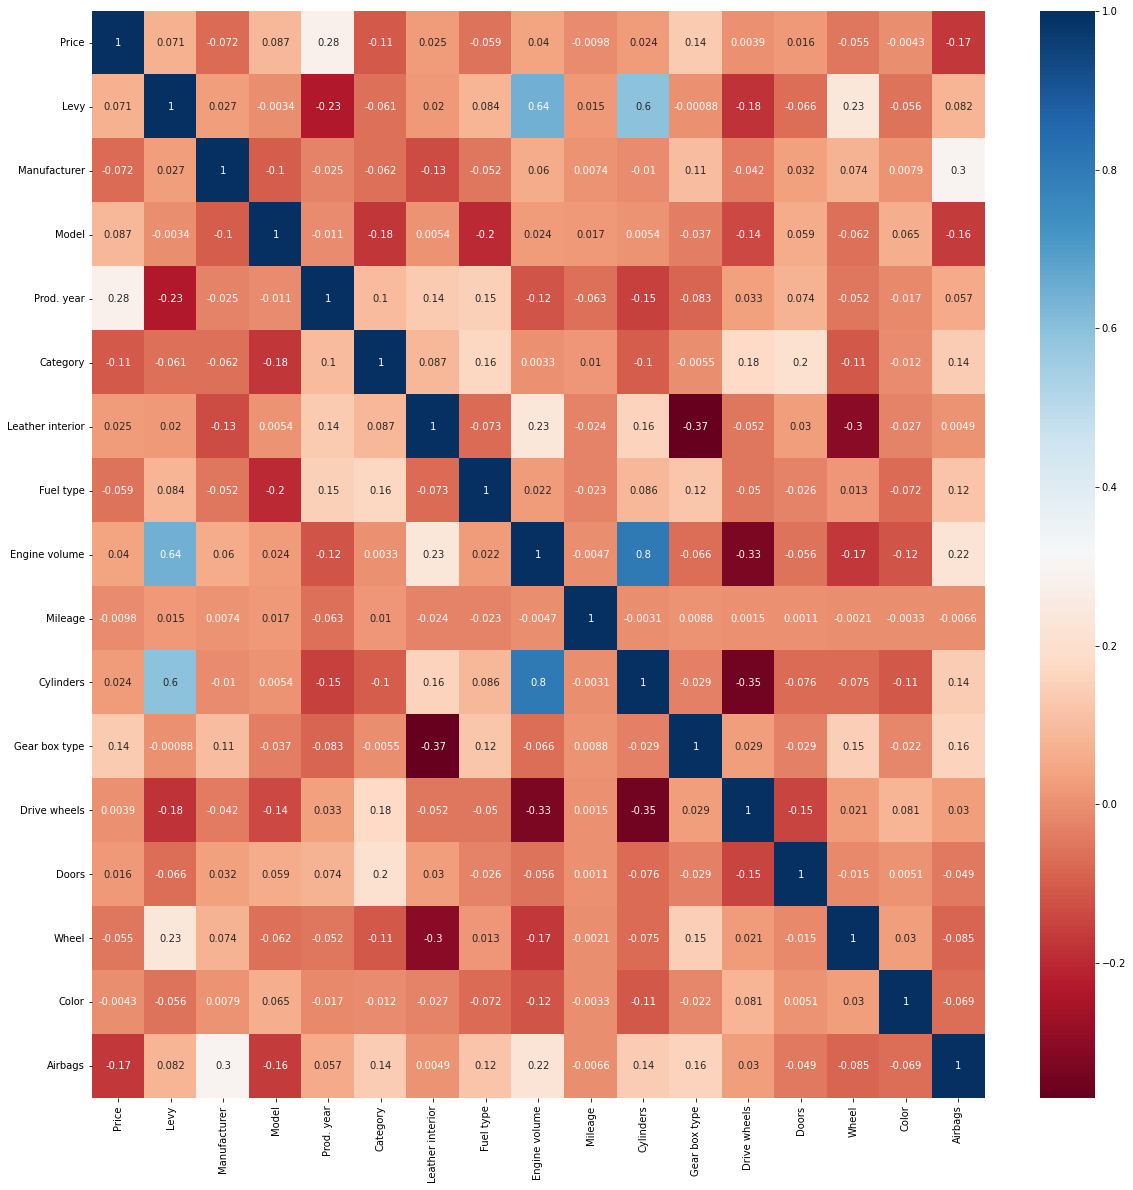

In [90]:
    plt.subplots(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, cmap = 'RdBu')
plt.show()

In [91]:
data_out = data.copy()

In [92]:
data_out.copy().reset_index(inplace=True)

In [93]:
data_out.nunique()

Price               1793
Levy                 507
Manufacturer          48
Model                677
Prod. year            29
Category              10
Leather interior       2
Fuel type              6
Engine volume         84
Mileage             5404
Cylinders             12
Gear box type          4
Drive wheels           3
Doors                  3
Wheel                  2
Color                 16
Airbags               16
dtype: int64

In [94]:
data_out['Airbags'].value_counts()

4     3590
12    3578
0     1315
8      566
10     352
6      292
2      165
16      35
7       30
9       21
11      18
5       13
14      12
1        6
3        5
15       2
Name: Airbags, dtype: int64

In [38]:
data_out.describe()

Price          Levy  Manufacturer         Model    Prod. year  \
count   10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean    17424.103900    905.614700     24.822200    369.254100   2013.147500   
std     19955.269904    440.477962     13.201713    178.133789      3.051143   
min         3.000000     87.000000      0.000000      0.000000   1965.000000   
25%      3763.000000    640.000000     18.000000    236.750000   2011.000000   
50%     13768.000000    781.000000     18.000000    360.000000   2013.000000   
75%     23521.000000   1058.000000     40.000000    542.000000   2015.000000   
max    872946.000000  11714.000000     47.000000    676.000000   2020.000000   

           Category  Leather interior    Fuel type  Engine volume  \
count  10000.000000        10000.0000  10000.00000   10000.000000   
mean       5.853400            0.8565      2.82480      31.681700   
std        2.261199            0.3506      1.28494      13.451018   
min        0.000000            0.0000      0.00000       0.000000   
25%        4.000000            1.0000      2.00000      23.000000   
50%        6.000000            1.0000      4.00000      27.000000   
75%        8.000000            1.0000      4.00000      36.000000   
max        9.000000            1.0000      5.00000      83.000000   

            Mileage     Cylinders  Gear box type  Drive wheels         Doors  \
count  1.000000e+04  10000.000000   10000.000000   10000.00000  10000.000000   
mean   2.384895e+05      4.512400       0.288700       0.87100      0.987400   
std    9.999218e+06      1.124532       0.732397       0.49516      0.132827   
min    0.000000e+00      1.000000       0.000000       0.00000      0.000000   
25%    6.778875e+04      4.000000       0.000000       1.00000      1.000000   
50%    1.184000e+05      4.000000       0.000000       1.00000      1.000000   
75%    1.793810e+05      4.000000       0.000000       1.00000      1.000000   
max    1.000000e+09     16.000000       3.000000       2.00000      2.000000   

             Wheel         Color       Airbags  
count  10000.00000  10000.000000  10000.000000  
mean       0.02370      7.876000      6.886700  
std        0.15212      5.377668      4.455429  
min        0.00000      0.000000      0.000000  
25%        0.00000      1.000000      4.000000  
50%        0.00000      7.000000      4.000000  
75%        0.00000     14.000000     12.000000  
max        1.00000     15.000000     16.000000

<AxesSubplot:>

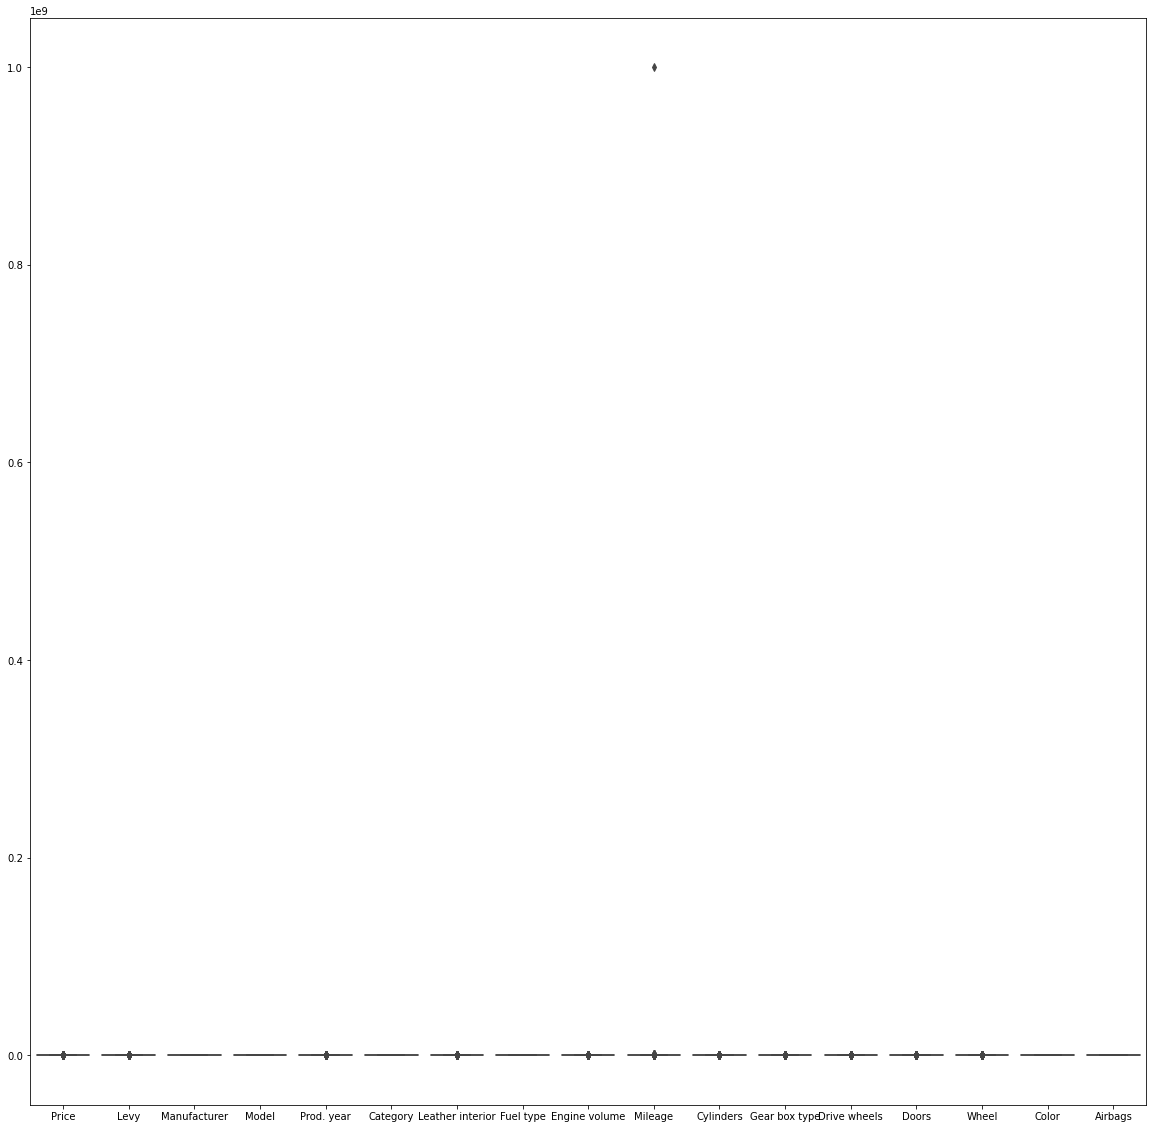

In [39]:
plt.subplots(figsize=(20,20))
sns.boxplot(data_out)

In [40]:
# Outlier Treatment

In [41]:
for i in data_out.columns:
    Q1 = data_out[i].quantile(0.25)
    Q3 = data_out[i].quantile(0.75)
    IQR = Q3 - Q1
    print("Q1, Q3 and IQR for col {} is {}, {}, {}".format(i,Q1, Q3, IQR))
    print("Q1 - 1.5 * IQR for col {} is {}".format(i, (Q1 - 1.5 * IQR)))
    print("Q1 + 1.5 * IQR for col {} is {}".format(i, (Q1 + 1.5 * IQR)))
    

Q1, Q3 and IQR for col Price is 3763.0, 23521.0, 19758.0
Q1 - 1.5 * IQR for col Price is -25874.0
Q1 + 1.5 * IQR for col Price is 33400.0
Q1, Q3 and IQR for col Levy is 640.0, 1058.0, 418.0
Q1 - 1.5 * IQR for col Levy is 13.0
Q1 + 1.5 * IQR for col Levy is 1267.0
Q1, Q3 and IQR for col Manufacturer is 18.0, 40.0, 22.0
Q1 - 1.5 * IQR for col Manufacturer is -15.0
Q1 + 1.5 * IQR for col Manufacturer is 51.0
Q1, Q3 and IQR for col Model is 236.75, 542.0, 305.25
Q1 - 1.5 * IQR for col Model is -221.125
Q1 + 1.5 * IQR for col Model is 694.625
Q1, Q3 and IQR for col Prod. year is 2011.0, 2015.0, 4.0
Q1 - 1.5 * IQR for col Prod. year is 2005.0
Q1 + 1.5 * IQR for col Prod. year is 2017.0
Q1, Q3 and IQR for col Category is 4.0, 8.0, 4.0
Q1 - 1.5 * IQR for col Category is -2.0
Q1 + 1.5 * IQR for col Category is 10.0
Q1, Q3 and IQR for col Leather interior is 1.0, 1.0, 0.0
Q1 - 1.5 * IQR for col Leather interior is 1.0
Q1 + 1.5 * IQR for col Leather interior is 1.0
Q1, Q3 and IQR for col Fuel typ

In [42]:
cols = ['Price', 'Levy', 'Prod. year', 'Engine volume', 'Mileage']
for i in cols:
    Q1 = data_out[i].quantile(0.25)
    Q3 = data_out[i].quantile(0.75)
    IQR = Q3 - Q1
    print(IQR)
    data_out = data_out[~((data_out[i] < (Q1 - 1.5 * IQR)) |(data_out[i] > (Q3 + 1.5 * IQR)))]
 


19758.0
415.0
4.0
13.0
104949.75


<AxesSubplot:>

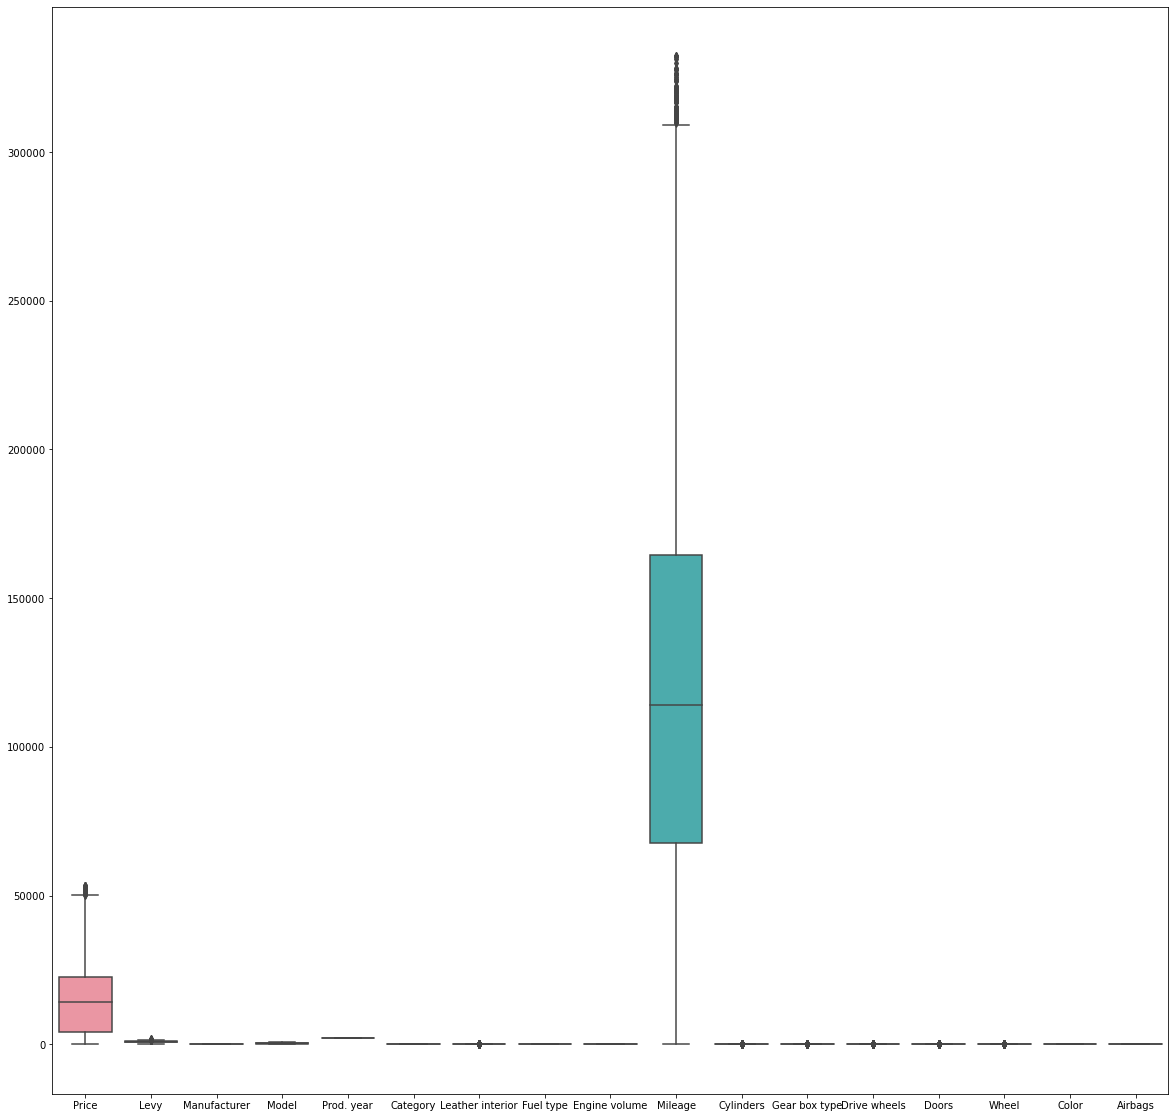

In [43]:
plt.subplots(figsize=(20,20))
sns.boxplot(data_out)

In [44]:
data_out.describe()

Price         Levy  Manufacturer        Model   Prod. year  \
count   8365.000000  8365.000000   8365.000000  8365.000000  8365.000000   
mean   15643.610281   812.458697     24.676868   360.276509  2013.232875   
std    13002.159614   267.670906     13.473319   179.245072     2.634756   
min        3.000000   173.000000      0.000000     0.000000  2005.000000   
25%     4077.000000   639.000000     17.000000   218.000000  2011.000000   
50%    14113.000000   777.000000     18.000000   360.000000  2013.000000   
75%    22580.000000   988.000000     40.000000   532.000000  2015.000000   
max    53154.000000  1673.000000     47.000000   676.000000  2020.000000   

          Category  Leather interior    Fuel type  Engine volume  \
count  8365.000000       8365.000000  8365.000000    8365.000000   
mean      5.905678          0.842558     2.769396      29.238494   
std       2.264667          0.364239     1.303720      10.497951   
min       0.000000          0.000000     0.000000       4.000000   
25%       4.000000          1.000000     1.000000      23.000000   
50%       8.000000          1.000000     3.000000      27.000000   
75%       8.000000          1.000000     4.000000      36.000000   
max       9.000000          1.000000     5.000000      55.000000   

             Mileage    Cylinders  Gear box type  Drive wheels        Doors  \
count    8365.000000  8365.000000    8365.000000   8365.000000  8365.000000   
mean   121676.698625     4.292767       0.302212      0.901733     0.989121   
std     72257.475562     0.769611       0.753599      0.447270     0.124676   
min         0.000000     1.000000       0.000000      0.000000     0.000000   
25%     67861.000000     4.000000       0.000000      1.000000     1.000000   
50%    114000.000000     4.000000       0.000000      1.000000     1.000000   
75%    164470.000000     4.000000       0.000000      1.000000     1.000000   
max    332243.000000    16.000000       3.000000      2.000000     2.000000   

             Wheel        Color      Airbags  
count  8365.000000  8365.000000  8365.000000  
mean      0.022594     7.958279     6.986970  
std       0.148615     5.373635     4.359689  
min       0.000000     0.000000     0.000000  
25%       0.000000     1.000000     4.000000  
50%       0.000000     7.000000     6.000000  
75%       0.000000    14.000000    12.000000  
max       1.000000    15.000000    16.000000

In [46]:
data_out.isna().sum()

Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [47]:
data_out = data_out.dropna()

In [48]:
data_out.reset_index(inplace =True)

In [49]:
data_out = data_out.drop(['index'], axis =1)

In [50]:
data_out

Price  Levy  Manufacturer  Model  Prod. year  Category  \
0     13328.0  1399            25    544        2010         4   
1     16621.0  1018             6    277        2011         4   
2      3607.0   862            14    280        2011         4   
3     11726.0   446            17    294        2014         3   
4     39493.0   891            18    563        2016         4   
...       ...   ...           ...    ...         ...       ...   
8360  18760.0   986            21    197        2010         4   
8361   6743.0  1156            14    457        2017         8   
8362  18189.0   586            18    270        2012         8   
8363  24618.0   697            17    373        2015         4   
8364   3293.0  1104             3    656        2015         4   

      Leather interior  Fuel type  Engine volume  Mileage  Cylinders  \
0                    1          2             51   186005        6.0   
1                    0          4             46   192000        6.0   
2                    1          2             36   168966        4.0   
3                    1          4             13    91901        4.0   
4                    1          1             27   160931        4.0   
...                ...        ...            ...      ...        ...   
8360                 1          4             34   116000        4.0   
8361                 1          4             32    61653        4.0   
8362                 1          4             23    48000        4.0   
8363                 1          4             23    64269        4.0   
8364                 1          1             46   196614        6.0   

      Gear box type  Drive wheels  Doors  Wheel  Color  Airbags  
0                 0             0      1      0     12       12  
1                 2             0      1      0      1        8  
2                 0             0      1      0     14        0  
3                 0             1      1      0     12        4  
4                 0             1      1      0     14        4  
...             ...           ...    ...    ...    ...      ...  
8360              0             1      1      0     12        4  
8361              0             2      1      0      1       12  
8362              2             1      1      0      1       12  
8363              0             1      1      0      7        0  
8364              0             0      1      0      1        0  

[8365 rows x 17 columns]

<AxesSubplot:>

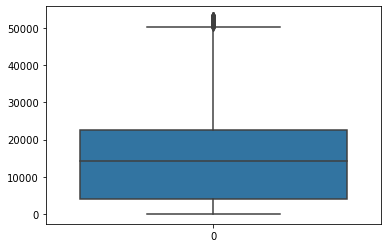

In [51]:
sns.boxplot(data_out['Price'])

<AxesSubplot:>

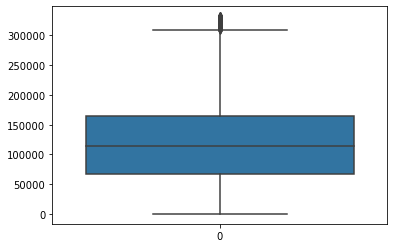

In [52]:
sns.boxplot(data_out['Mileage'])

<AxesSubplot:>

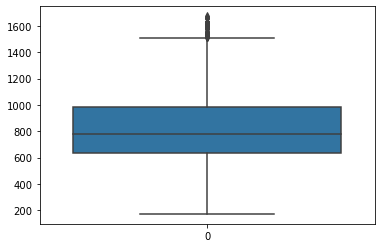

In [53]:
sns.boxplot(data_out['Levy'])

In [75]:
upper_limit = data_out['Levy'].quantile(0.96)
lower_limit = data_out['Levy'].quantile(0.01)
print(upper_limit, lower_limit)

1347.0 308.0


In [76]:
test = data_out[(data_out['Levy'] <= upper_limit) & (data_out['Levy']>= lower_limit)]

In [77]:
sns.boxplot(test['Levy'])

KeyError: 0

<AxesSubplot:>

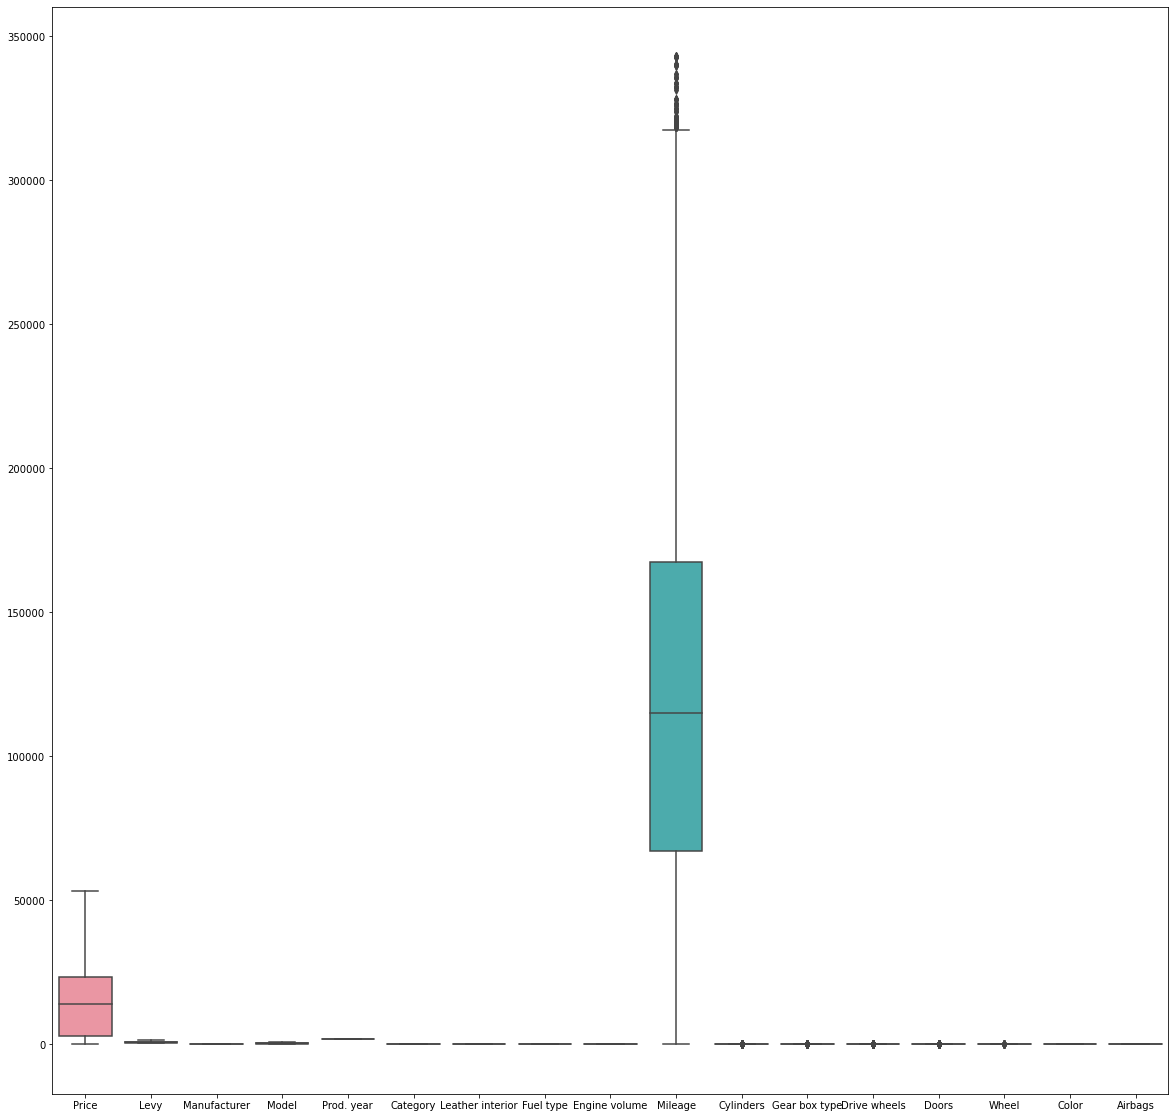

In [200]:
plt.subplots(figsize=(20,20))
sns.boxplot(data_out)

In [201]:
upper_limit = data_out['Mileage'].quantile(0.99)
lower_limit = data_out['Mileage'].quantile(0.02)
print(upper_limit, lower_limit)

319794.56 0.0


In [202]:
data_out = data_out[(data_out['Mileage'] <= upper_limit) & (data_out['Mileage']>= lower_limit)]

<AxesSubplot:>

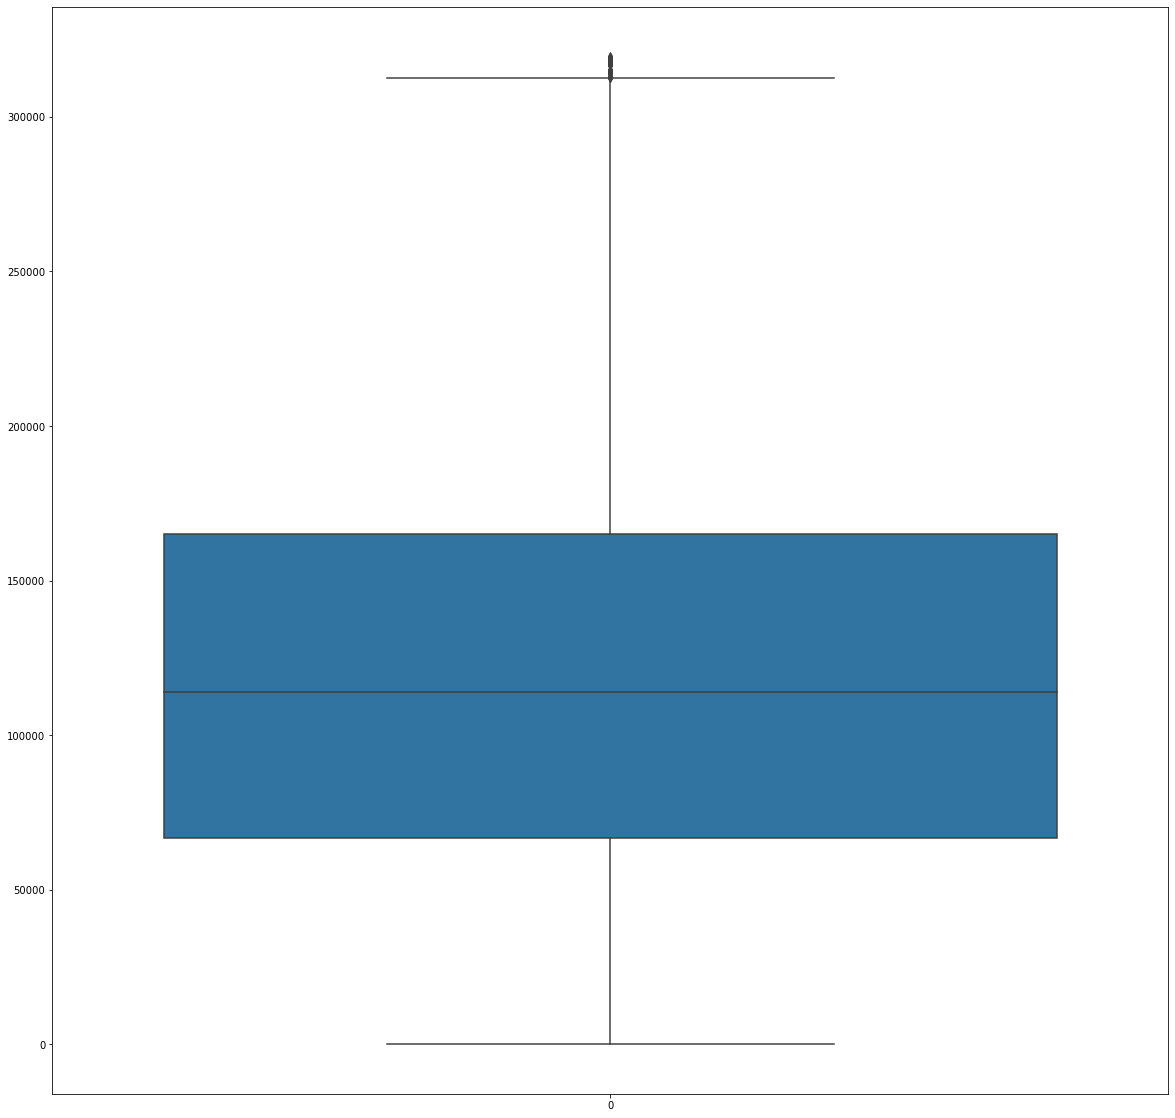

In [203]:
plt.subplots(figsize=(20,20))
sns.boxplot(data_out['Mileage'])

<AxesSubplot:>

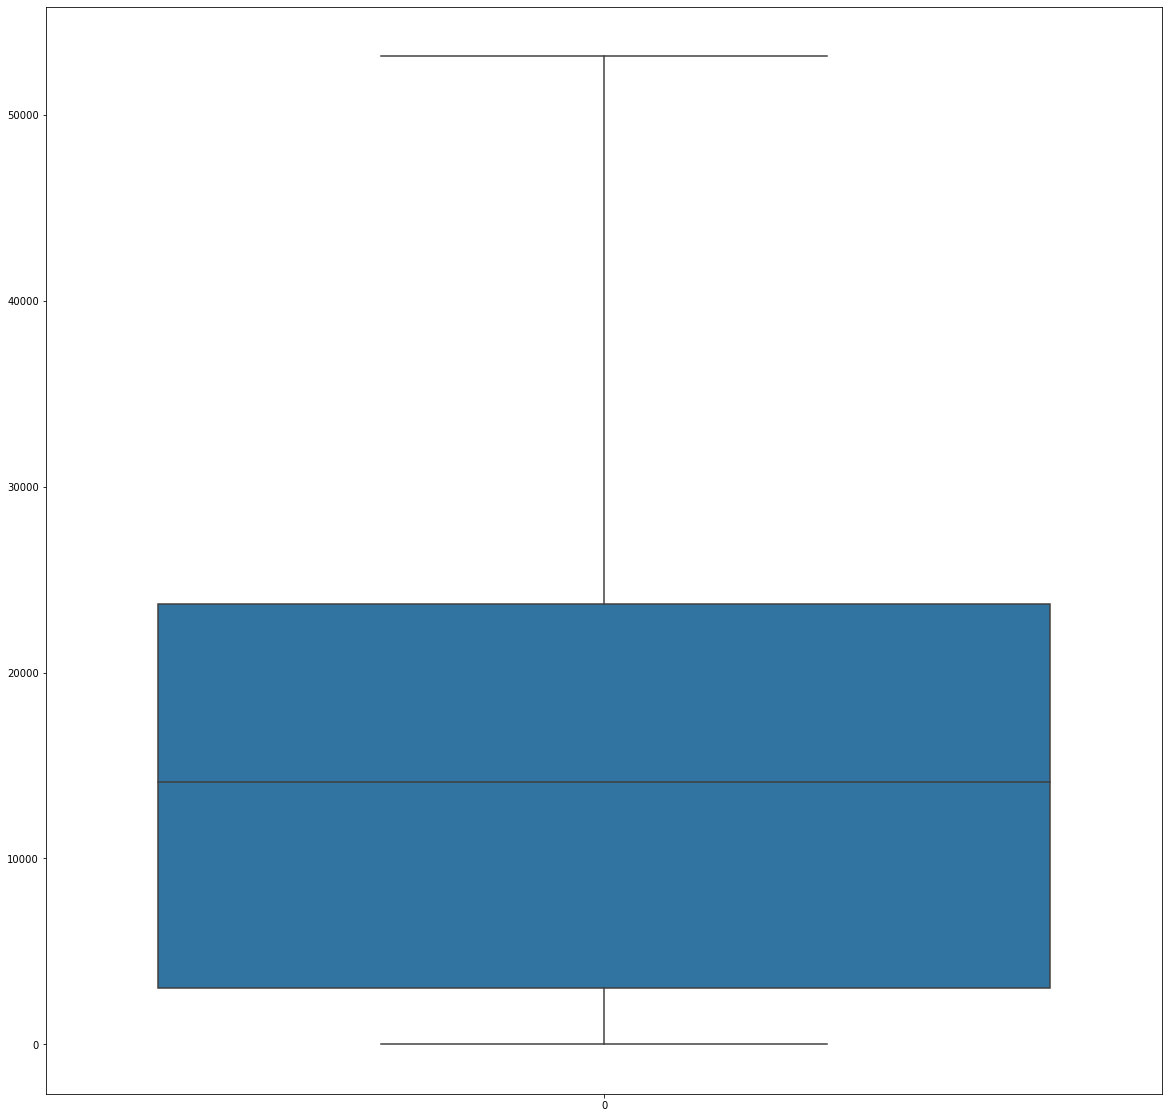

In [204]:
plt.subplots(figsize=(20,20))
sns.boxplot(data_out['Price'])

<AxesSubplot:ylabel='Gear box type'>

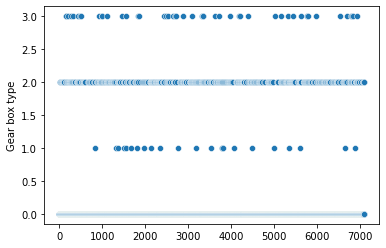

In [205]:
sns.scatterplot(data_out['Gear box type'])

In [206]:
#feature selection

In [207]:
x= data_out.iloc[:,1:]
y= data_out.iloc[:,0]

In [208]:
x

Levy  Manufacturer  Model  Prod. year  Category  Leather interior  \
0     1399            25    544        2010         4                 1   
1      862            14    280        2011         4                 1   
2      446            17    294        2014         3                 1   
3      891            18    563        2016         4                 1   
4      761            44    500        2010         3                 1   
...    ...           ...    ...         ...       ...               ...   
7075   986            21    197        2010         4                 1   
7076  1156            14    457        2017         8                 1   
7077   586            18    270        2012         8                 1   
7078   697            17    373        2015         4                 1   
7079  1104             3    656        2015         4                 1   

      Fuel type  Engine volume  Mileage  Cylinders  Gear box type  \
0             2             51   186005        6.0              0   
1             2             36   168966        4.0              0   
2             4             13    91901        4.0              0   
3             1             27   160931        4.0              0   
4             2             23   258909        4.0              0   
...         ...            ...      ...        ...            ...   
7075          4             34   116000        4.0              0   
7076          4             32    61653        4.0              0   
7077          4             23    48000        4.0              2   
7078          4             23    64269        4.0              0   
7079          1             46   196614        6.0              0   

      Drive wheels  Doors  Wheel  Color  Airbags  
0                0      1      0     12       12  
1                0      1      0     14        0  
2                1      1      0     12        4  
3                1      1      0     14        4  
4                1      1      0     14       12  
...            ...    ...    ...    ...      ...  
7075             1      1      0     12        4  
7076             2      1      0      1       12  
7077             1      1      0      1       12  
7078             1      1      0      7        0  
7079             0      1      0      1        0  

[6765 rows x 16 columns]

In [209]:
from sklearn.feature_selection import mutual_info_classif

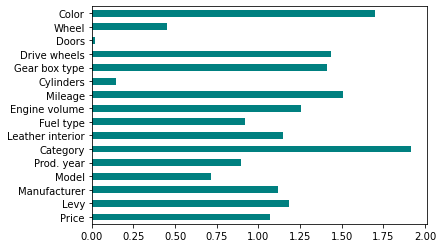

In [210]:
importances = mutual_info_classif(x,y)
feat_impor = pd.Series(importances, data.columns[0:len(data.columns)-1])
feat_impor.plot(kind='barh', color = 'teal')
plt.show()
                                                

In [211]:
x.nunique()

Levy                 238
Manufacturer          39
Model                397
Prod. year            15
Category              10
Leather interior       1
Fuel type              5
Engine volume         42
Mileage             4145
Cylinders             10
Gear box type          4
Drive wheels           3
Doors                  3
Wheel                  2
Color                 16
Airbags               14
dtype: int64

<AxesSubplot:>

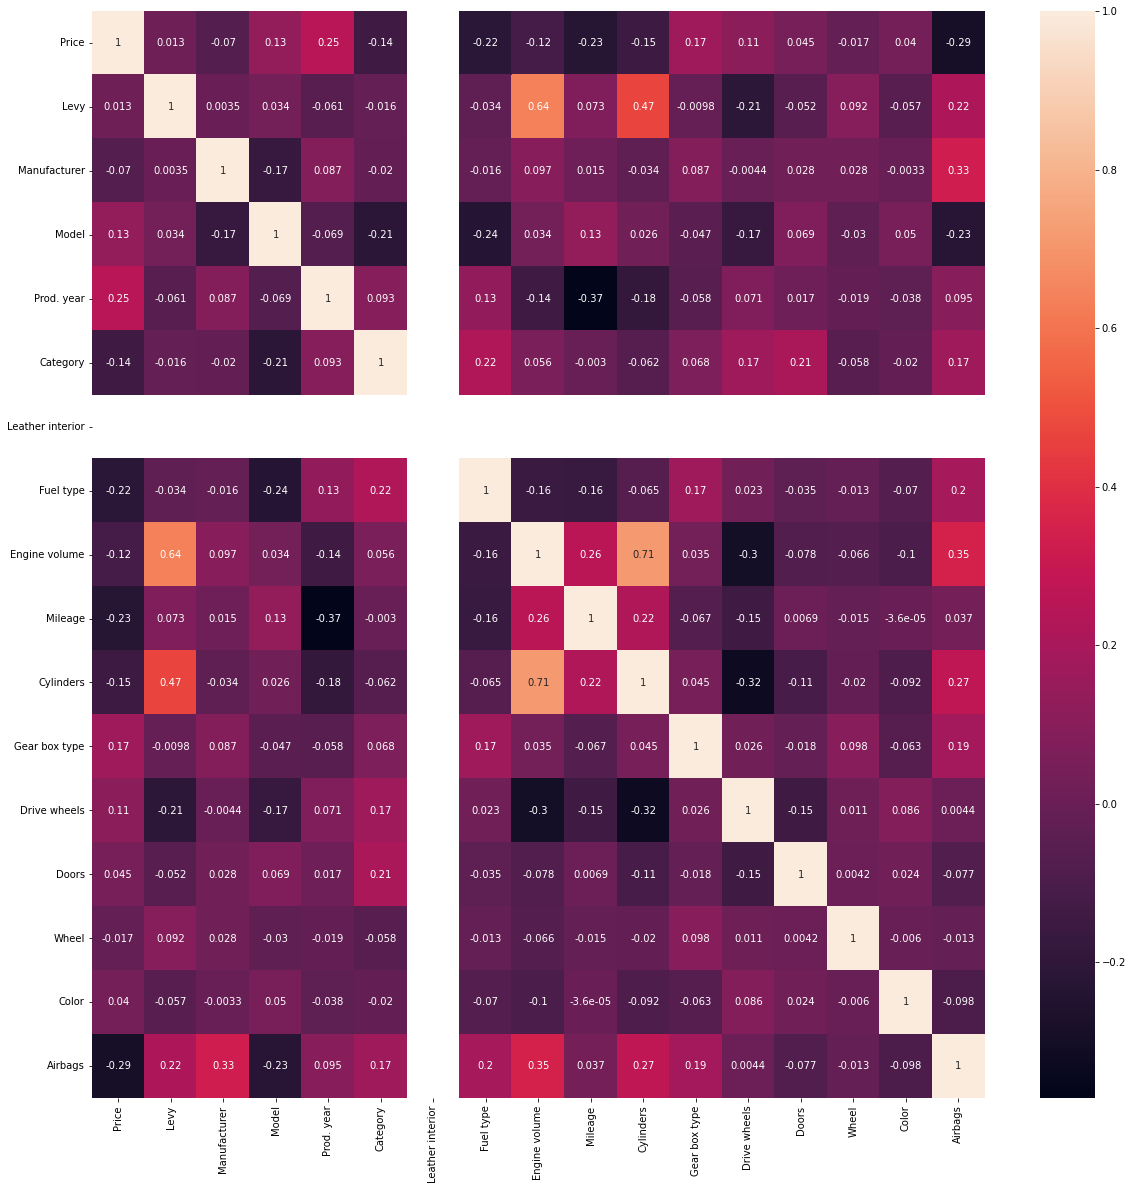

In [212]:
plt.subplots(figsize=(20,20))
sns.heatmap(data_out.corr(), annot=True)

In [213]:
#from the heatmap we can see that cylinders are highly correlated so removing that, mileage and prod year are correlated but I think those are the important features so not removing any
#from the feature classifier Doors and Cylinder are least important feature so removing those
#I THINK leaether interior also isn't an important feature and that has been removed
x = x.drop(['Leather interior','Cylinders', 'Doors'], axis=1)

In [214]:
print(x.shape)
print(y.shape)

(6765, 13)
(6765,)


<ipython-input-215-5ec1fbeebf40>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)


<AxesSubplot:ylabel='Density'>

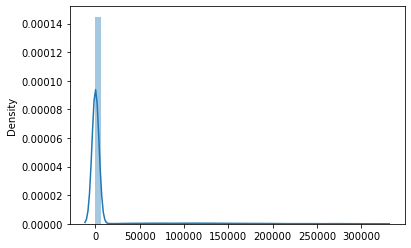

In [215]:
sns.distplot(x)

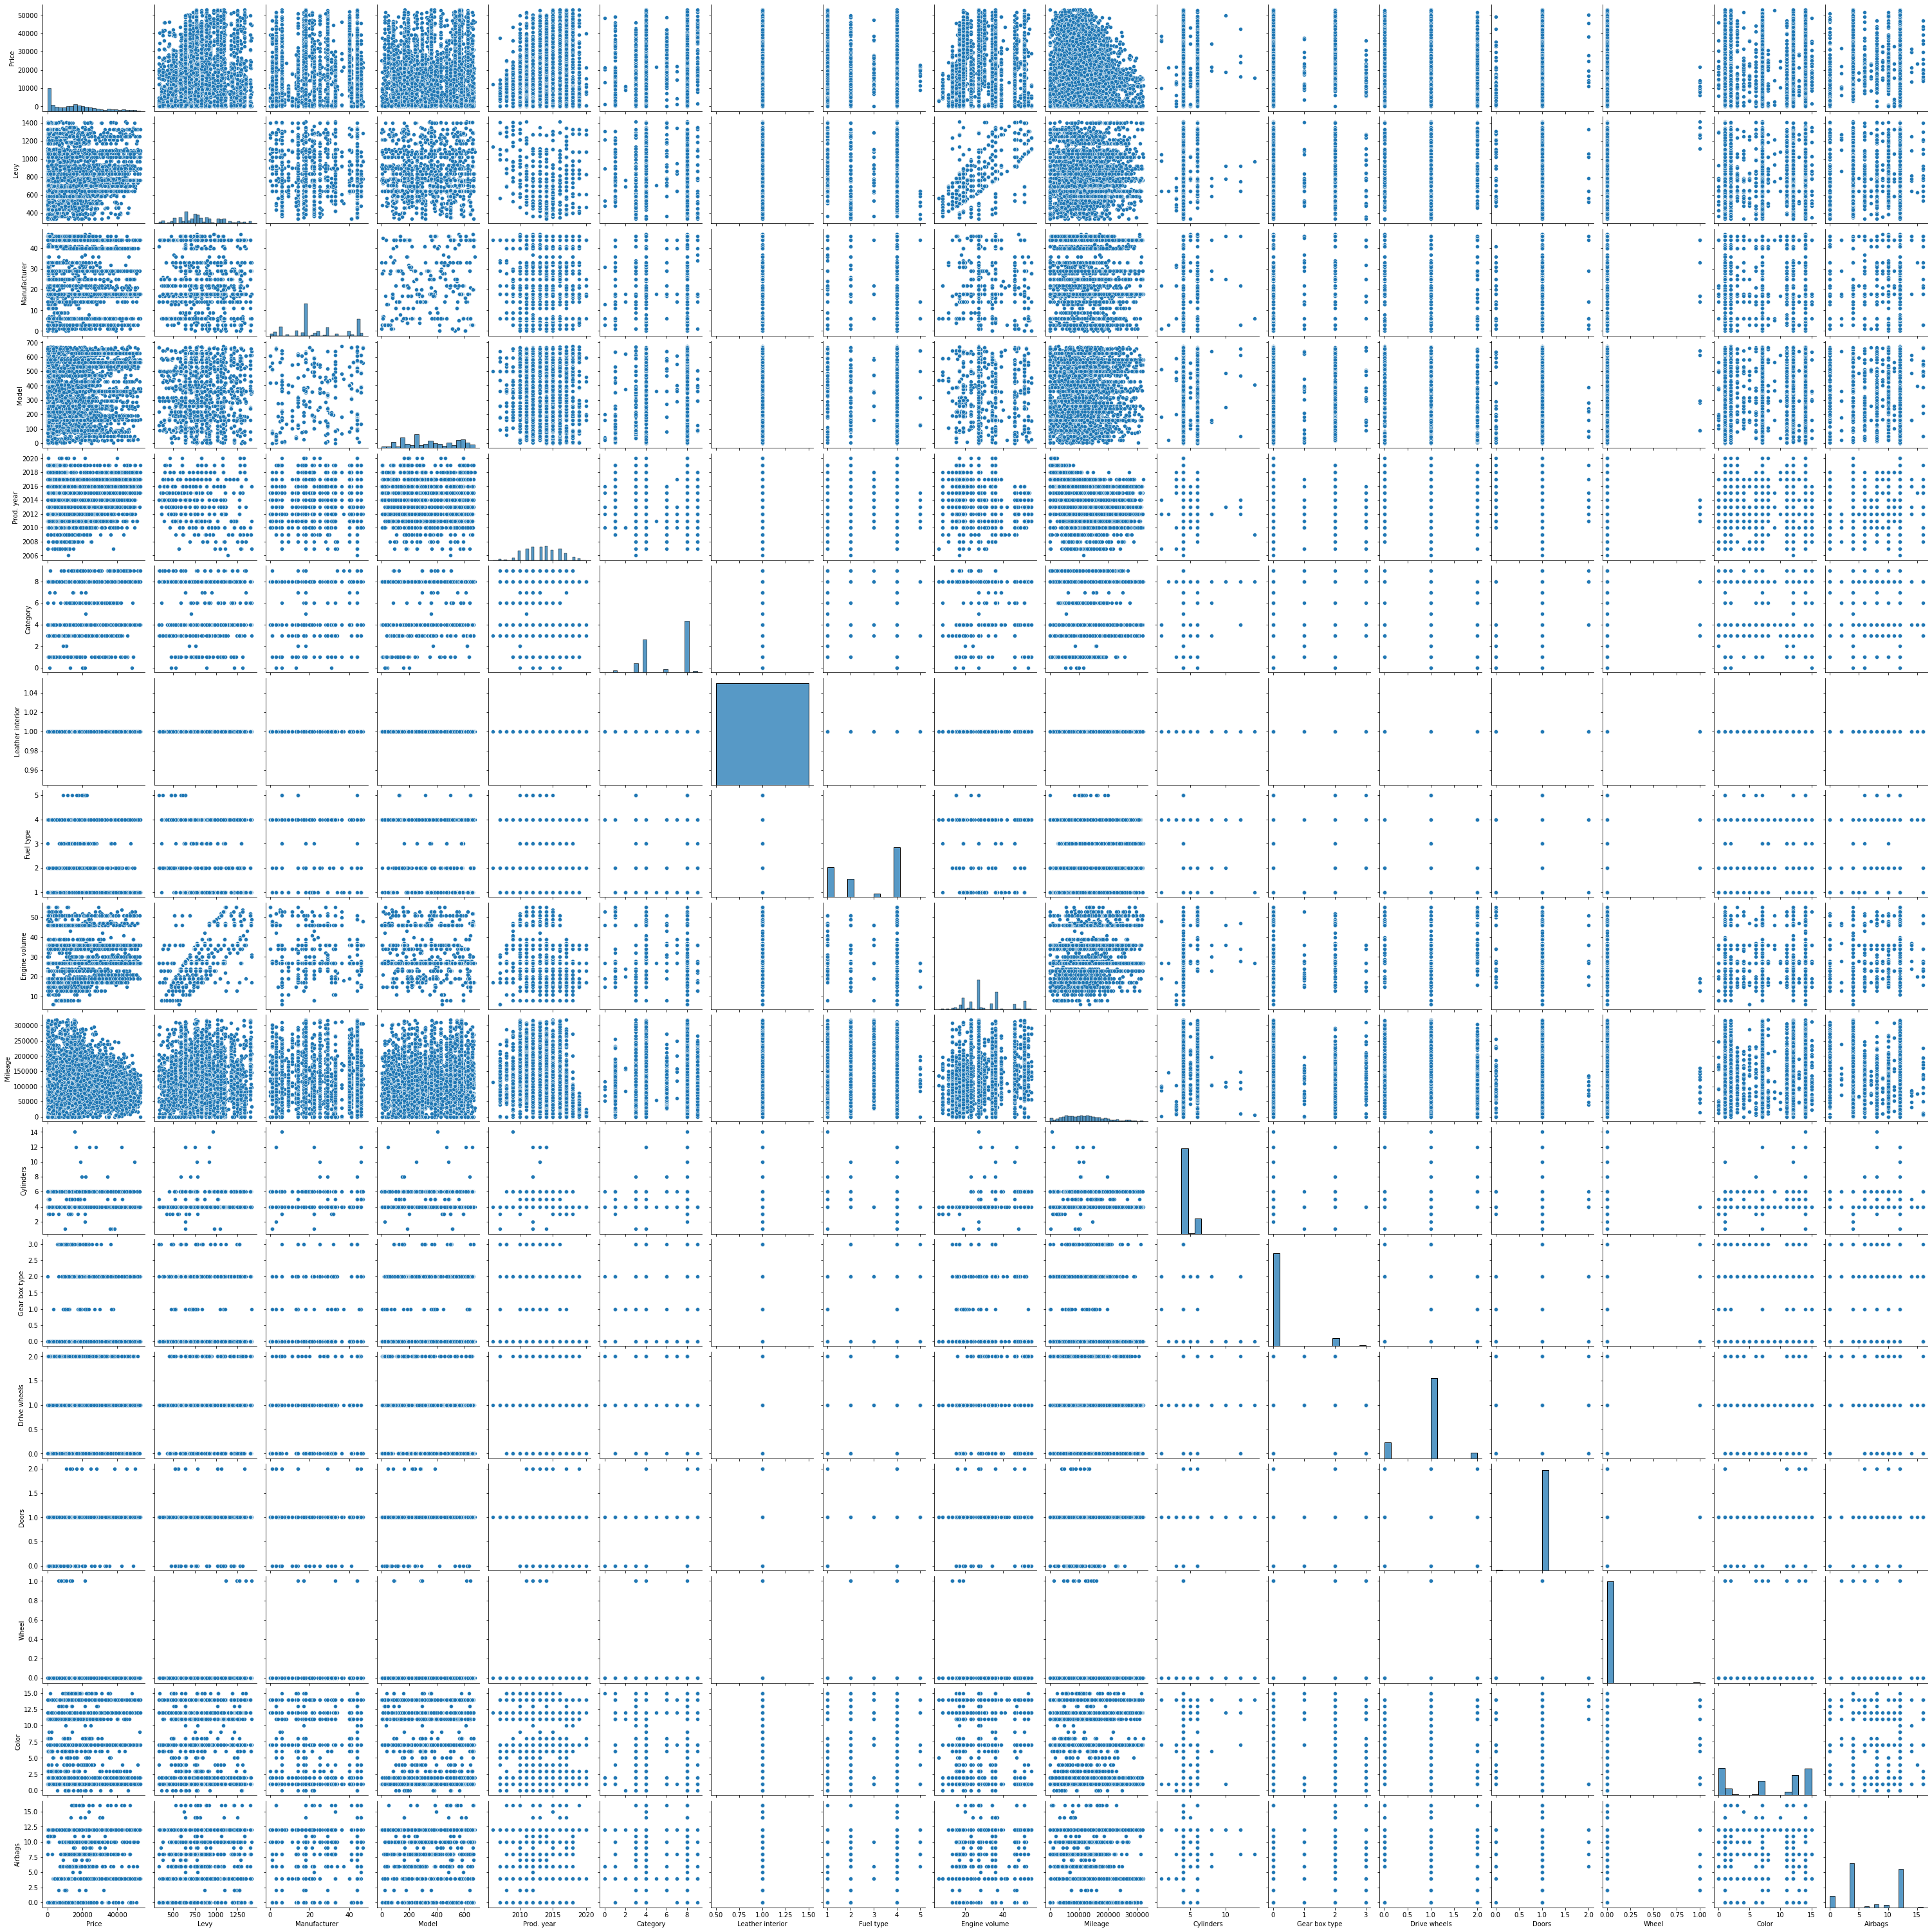

In [218]:
sns.pairplot(data_out)

In [106]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
#scaler = MinMaxScaler()
##data_out_scaled = pd.DataFrame(scaler.fit_transform(data_out_f))

In [49]:
#data_out_scaled

0         1         2         3     4         5     6         7  \
0    0.260863  0.805594  0.586207  0.799020  0.50  0.444444  0.25  0.578970   
1    0.325344  0.539161  0.103448  0.416667  0.55  0.444444  0.75  0.597630   
2    0.070512  0.430070  0.310345  0.421569  0.55  0.444444  0.25  0.525933   
3    0.229493  0.139161  0.379310  0.431373  0.70  0.333333  0.75  0.286056   
4    0.773209  0.450350  0.413793  0.828431  0.80  0.444444  0.00  0.500923   
..        ...       ...       ...       ...   ...       ...   ...       ...   
845  0.331493  0.862937  0.068966  0.970588  0.85  0.444444  0.75  0.254173   
846  0.061290  0.008392  0.103448  0.960784  0.70  0.333333  0.25  0.349000   
847  0.403963  0.274825  0.413793  0.936275  0.65  0.444444  0.00  0.200016   
848  0.497288  0.352448  0.551724  0.867647  0.65  0.444444  0.75  0.647672   
849  0.429752  0.450350  0.413793  0.401961  0.80  0.888889  0.75  0.054783   

            8    9        10      11  
0    0.000000  0.0  0.769231  0.7500  
1    0.666667  0.0  0.076923  0.5000  
2    0.000000  0.0  0.923077  0.0000  
3    0.000000  0.0  0.769231  0.2500  
4    0.000000  0.0  0.923077  0.2500  
..        ...  ...       ...     ...  
845  0.000000  0.0  0.923077  0.7500  
846  0.000000  0.0  0.769231  0.7500  
847  0.000000  0.0  0.538462  0.2500  
848  0.000000  0.0  0.769231  0.4375  
849  0.666667  0.0  0.076923  0.3750  

[850 rows x 12 columns]

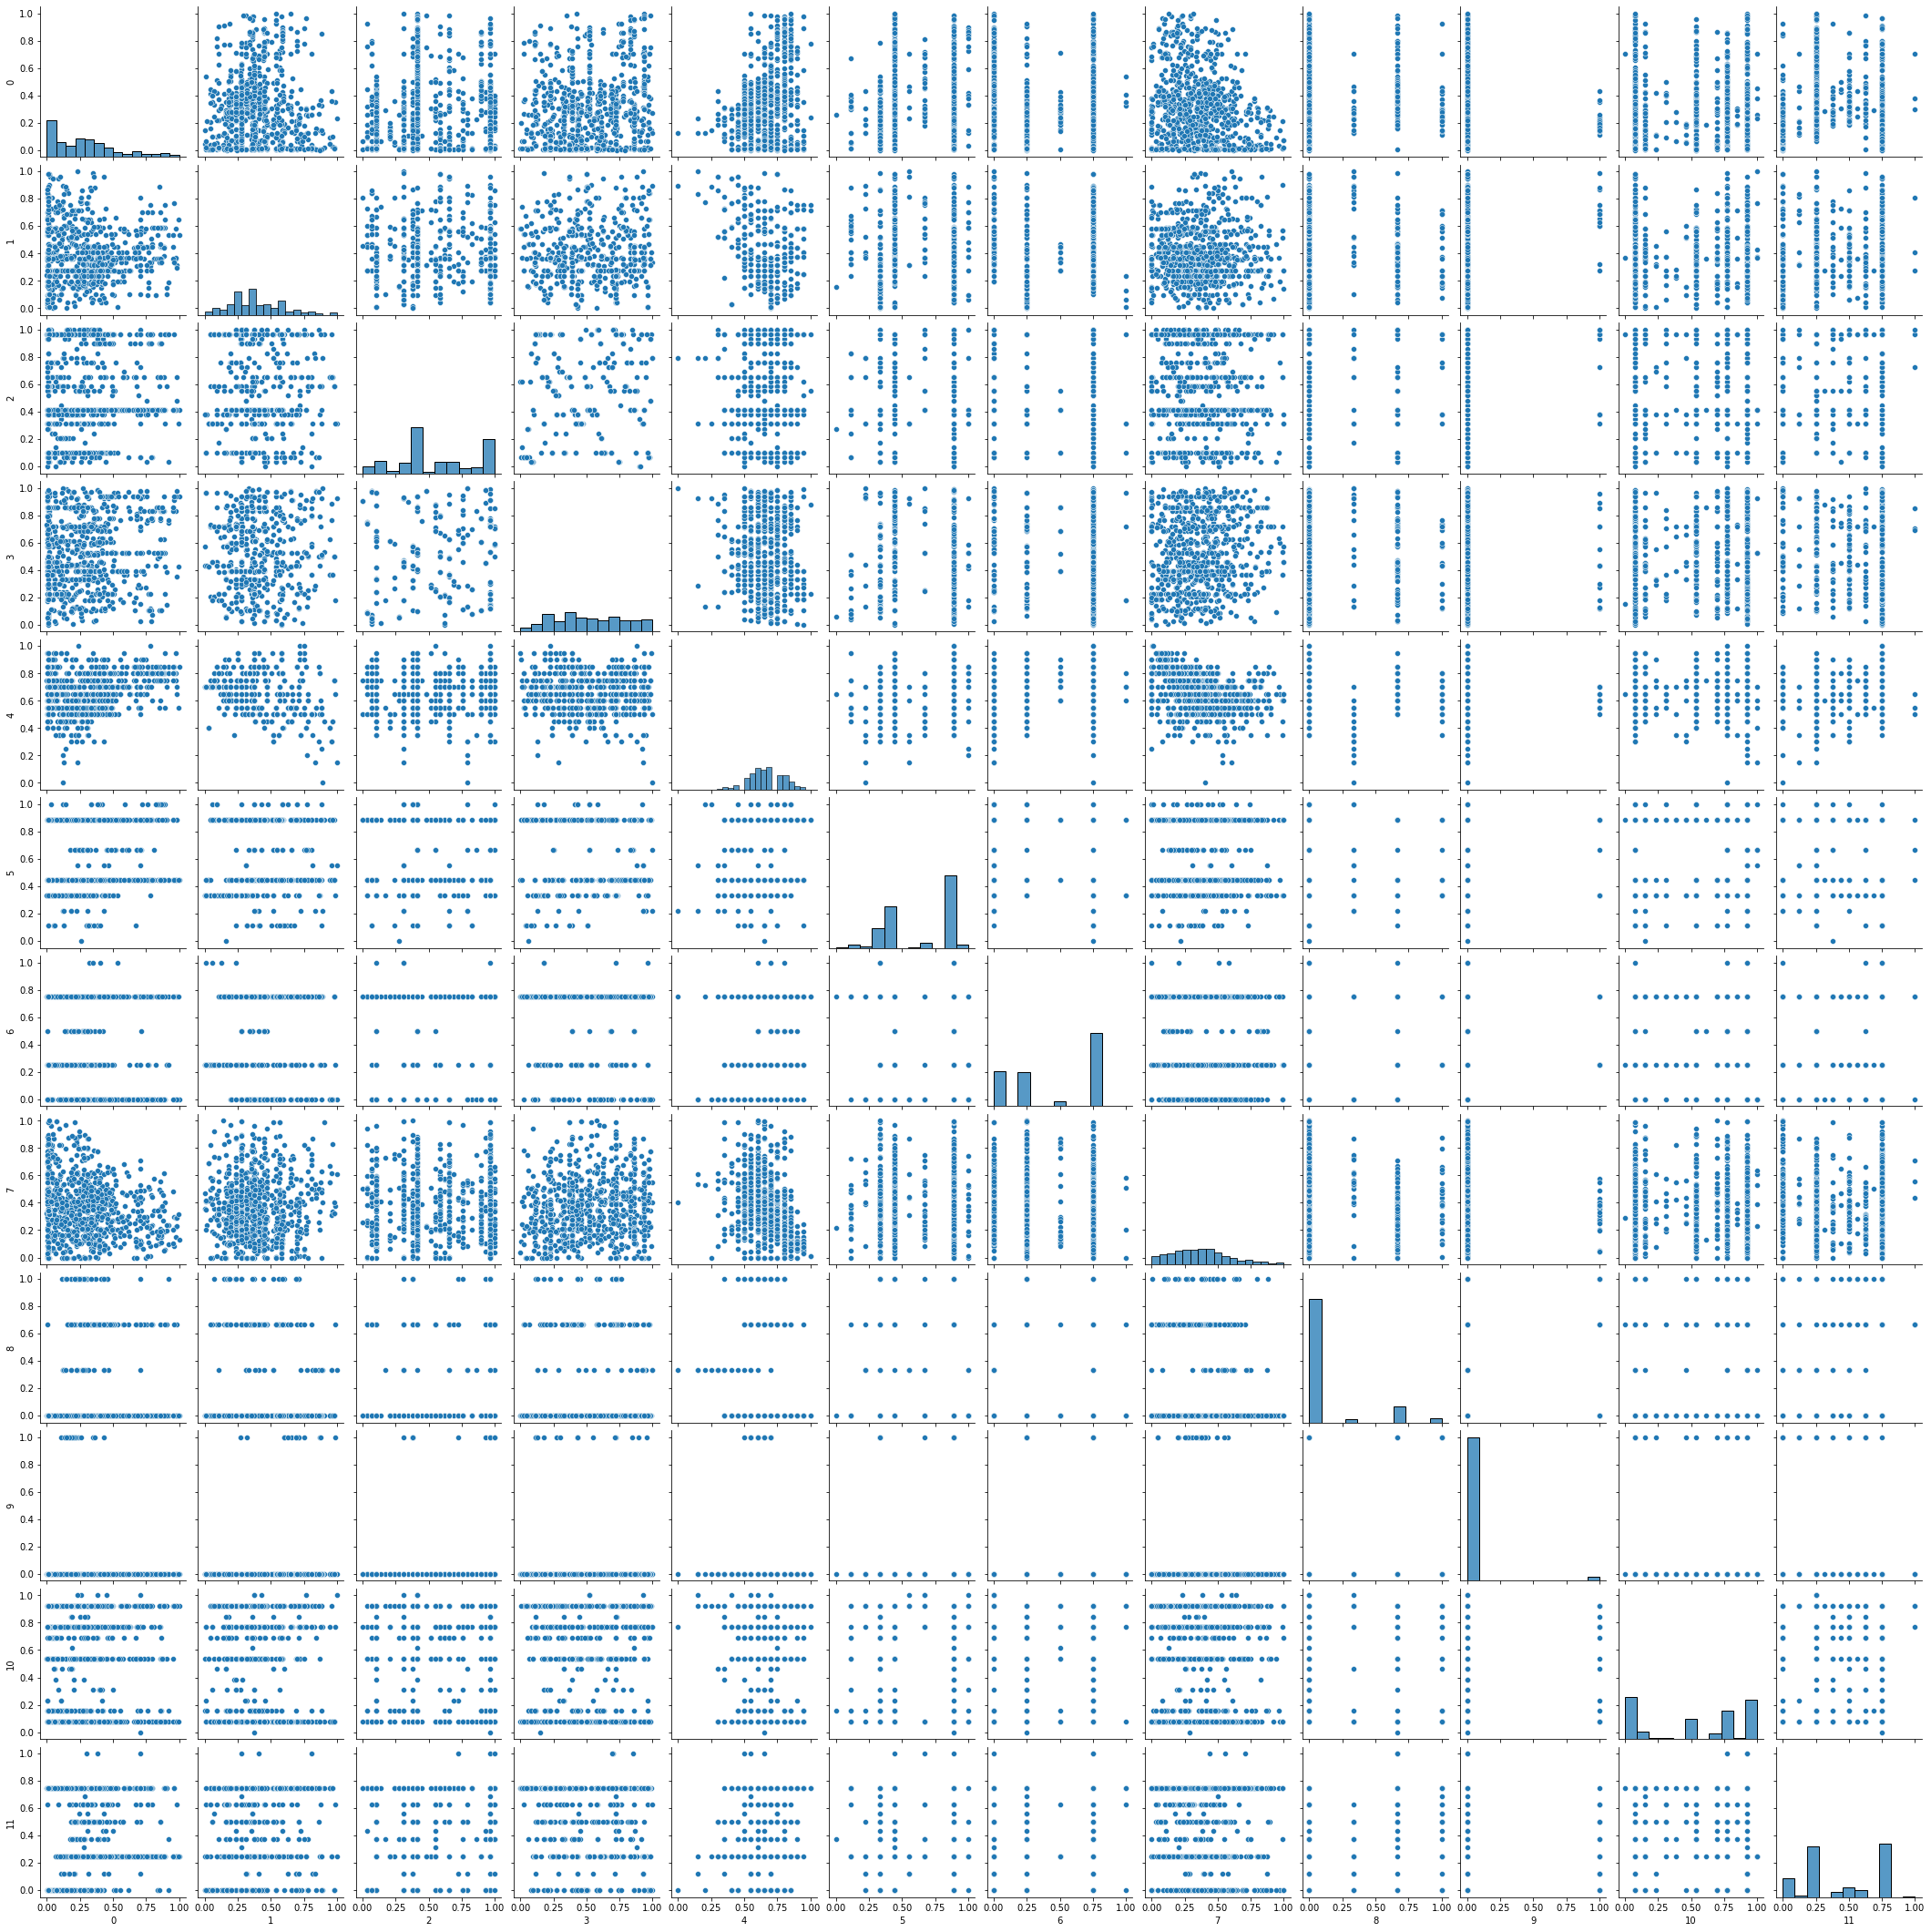

In [52]:
#sns.pairplot(data_out_scaled)

In [50]:
#x = data_out_scaled.iloc[:,1:]
#y = data_out_scaled.iloc[:,0]

In [219]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=30)

In [220]:
import statsmodels.api as sm

#adding a constant
X = sm.add_constant(x_train)

#performing the regression
result = sm.OLS(y_train, x_train).fit()

# Result of statsmodels 
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.686
Model:                            OLS   Adj. R-squared (uncentered):              0.686
Method:                 Least Squares   F-statistic:                              852.2
Date:                Fri, 07 Jul 2023   Prob (F-statistic):                        0.00
Time:                        10:39:22   Log-Likelihood:                         -54756.
No. Observations:                5073   AIC:                                  1.095e+05
Df Residuals:                    5060   BIC:                                  1.096e+05
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [221]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, svm

In [222]:
regr = LinearRegression()

regr.fit(x_train, y_train)

print(regr.score(x_test, y_test))

0.34884933700305343


In [223]:
from sklearn.metrics import r2_score
y_pred = regr.predict(x_test)

r2 = r2_score(y_test, y_pred)

print("R2 score:", r2)

R2 score: 0.34884933700305343


In [224]:
#USING Decision Tree REGRESSOR

In [225]:
from sklearn.tree import DecisionTreeRegressor

In [226]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [227]:
y_pred = regressor.predict(x_test)

In [228]:
pd.DataFrame(y_test, y_pred)

Price
157.0        NaN
18669.0      NaN
1803.0   21012.0
3763.0   10349.0
29445.0      NaN
...          ...
3763.0   10349.0
7056.0       NaN
28328.0      NaN
52959.0      NaN
2038.0   49237.0

[1692 rows x 1 columns]

In [229]:
y_pred

array([  157., 18669.,  1803., ..., 28328., 52959.,  2038.])

In [233]:
t = np.array([1399,17,163,2010,4,1,186005,0,0,10,12]).reshape(1,-1)

In [234]:
#Model score
regressor.score(x_train, y_train)

0.9971505906699093

In [235]:
from sklearn.metrics import mean_squared_error
ypred = regressor.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0))

MSE:  60569326.202152245
RMSE:  7782.629774192798


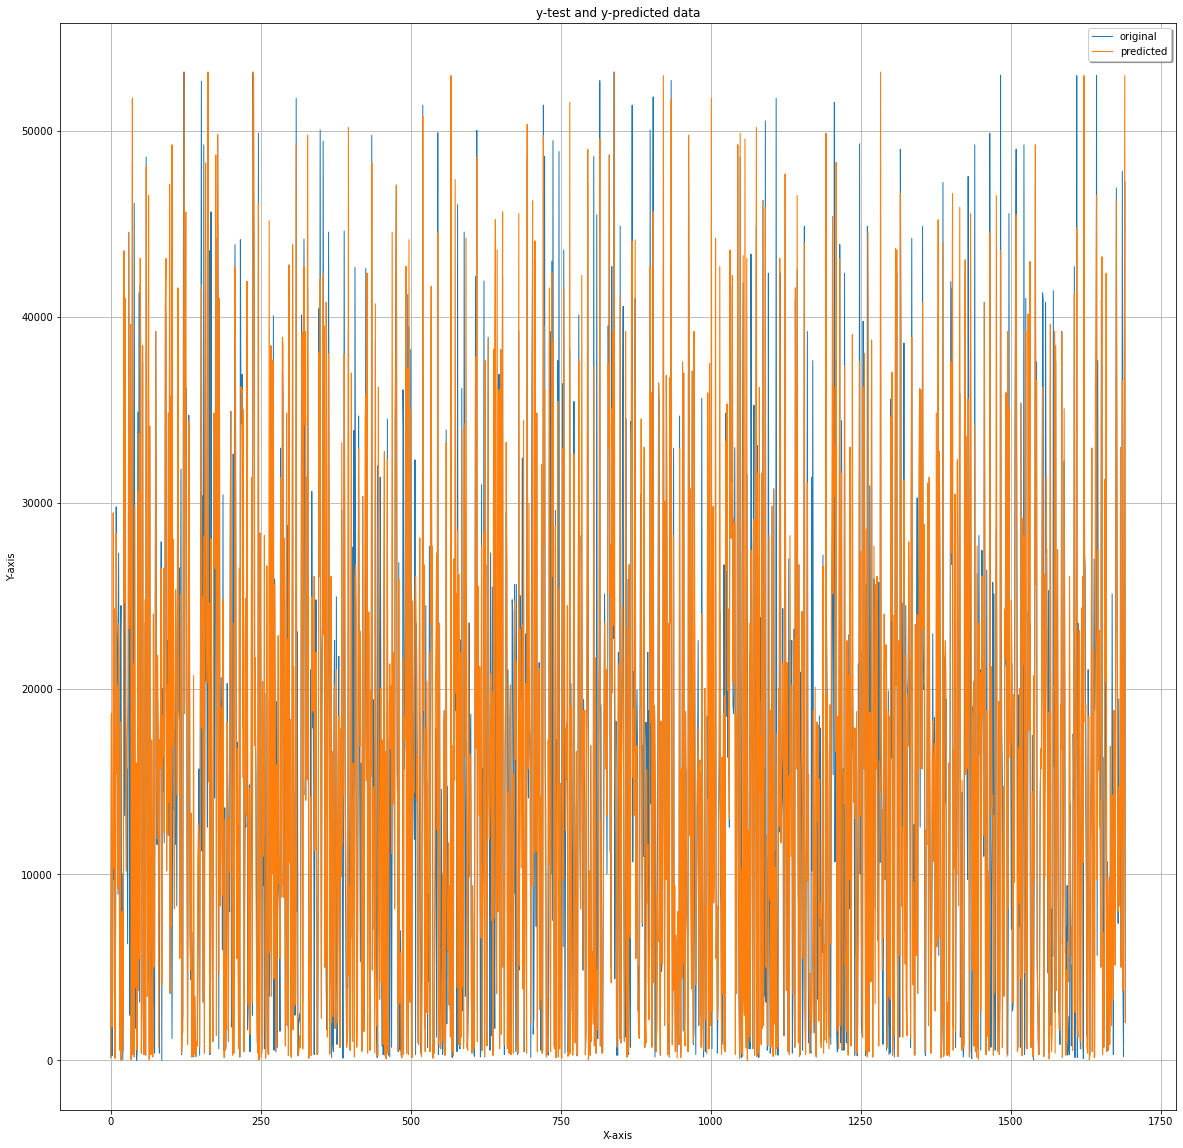

In [236]:
plt.subplots(figsize = (20,20))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [237]:
x1 = data_out_f.iloc[:,1:]
y1 = data_out_f.iloc[:,0]

NameError: name 'data_out_f' is not defined

In [128]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1,y1, test_size=0.25, random_state=30)

In [129]:
regressor1 = DecisionTreeRegressor(random_state=0)
regressor1.fit(x_train1,y_train1)

DecisionTreeRegressor(random_state=0)

In [240]:
pd.DataFrame(regressor.predict(x_test))

0
0       157.0
1     18669.0
2      1803.0
3      3763.0
4     29445.0
...       ...
1687   3763.0
1688   7056.0
1689  28328.0
1690  52959.0
1691   2038.0

[1692 rows x 1 columns]

In [241]:
y_test

4120      157.0
6799    18669.0
3668      251.0
6573     3763.0
7008    12027.0
         ...   
2554     3763.0
6326      220.0
5330    32578.0
6472    47217.0
2812     2038.0
Name: Price, Length: 1692, dtype: float64

In [132]:
data_out_f.describe()

Price         Levy  Manufacturer        Model   Prod. year  \
count   3918.000000  3918.000000   3918.000000  3918.000000  3918.000000   
mean   18370.136039   740.228688     22.757785   364.775906  2013.361664   
std    13974.525939   152.771066     12.242123   178.177104     2.483878   
min        3.000000   442.000000      0.000000     1.000000  2007.000000   
25%     5935.000000   639.000000     18.000000   218.000000  2011.000000   
50%    16761.000000   749.500000     18.000000   360.000000  2013.000000   
75%    27086.000000   836.000000     29.000000   563.000000  2015.000000   
max    53154.000000  1091.000000     46.000000   670.000000  2020.000000   

          Category    Fuel type  Engine volume        Mileage        Color  \
count  3918.000000  3918.000000    3918.000000    3918.000000  3918.000000   
mean      6.026544     2.604900      25.939765  118060.202654     8.673047   
std       2.195409     1.361829       6.551416   60200.406615     5.246251   
min       0.000000     1.000000       6.000000   19080.000000     0.000000   
25%       4.000000     1.000000      19.000000   68950.500000     2.000000   
50%       8.000000     3.000000      27.000000  113930.500000    12.000000   
75%       8.000000     4.000000      27.000000  157118.000000    14.000000   
max       9.000000     5.000000      53.000000  279276.000000    15.000000   

           Airbags  
count  3918.000000  
mean      5.791986  
std       3.695711  
min       0.000000  
25%       4.000000  
50%       4.000000  
75%       8.000000  
max      16.000000